In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df=pd.read_csv('/home/spartan/Desktop/hiringtask-master/machine_learning/ad_org/data/mn/ad_org_train.csv')

In [3]:
df.head(8)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
vidid        14999 non-null object
adview       14999 non-null int64
views        14999 non-null object
likes        14999 non-null object
dislikes     14999 non-null object
comment      14999 non-null object
published    14999 non-null object
duration     14999 non-null object
category     14999 non-null object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


## Data Cleaning 

In [5]:
def data_transformation(df1):
    df1['views'].replace('F', '-1',inplace=True)
    df1['comment'].replace('F', '-1',inplace=True)
    df1['likes'].replace('F', '-1',inplace=True)
    df1['dislikes'].replace('F', '-1',inplace=True)
    df1['views']=pd.to_numeric(df1['views'])
    df1['comment']=pd.to_numeric(df1['likes'])
    df1['likes']=pd.to_numeric(df1['comment'])
    df1['dislikes']=pd.to_numeric(df1['dislikes'])
    df1.drop(df1[df1['views']==-1].index,inplace=True)
    df1.drop(df1[df1['comment']==-1].index,inplace=True)
    df1.drop(df1[df1['likes']==-1].index,inplace=True)
    df1.drop(df1[df1['dislikes']==-1].index,inplace=True)
    
    return df1
    
    

In [6]:
df=data_transformation(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14842 entries, 0 to 14998
Data columns (total 9 columns):
vidid        14842 non-null object
adview       14842 non-null int64
views        14842 non-null int64
likes        14842 non-null int64
dislikes     14842 non-null int64
comment      14842 non-null int64
published    14842 non-null object
duration     14842 non-null object
category     14842 non-null object
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


                               Now we need to remove if there is a faulty row.

In [8]:
df[df['views']<df['likes']]#number of likes can not be more than views

,vidid,adview,views,likes,dislikes,comment,published,duration,category


In [9]:
df[df['views']<df['dislikes']]#dislikes should be less than views

,vidid,adview,views,likes,dislikes,comment,published,duration,category


In [10]:
df[df['views']<df['adview']]#adviews should be less than views

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14415,VID_2910,143124,142792,4,0,4,2014-11-26,PT1M37S,C


In [11]:
df[df['views']<df['comment']]

,vidid,adview,views,likes,dislikes,comment,published,duration,category


In [12]:
#so removing above row
df.drop(14415,inplace=True)

In [13]:
def encoding_category(df1):
    category_dummies=pd.get_dummies(df1['category'],prefix='Category')
    return category_dummies
def published_transformation(df1):
    today=datetime.date(2018,12,14)
    days_passed=[]
    for i in df1['published']:
        year=i[0:4]
        month=i[5:7].strip('0')
        day=i[8:10].lstrip('0')
        date=datetime.date(int(year),int(month),int(day))
        difference=(today-date).days
        days_passed.append(difference)
    
    return days_passed
def duration_transformtion(df1):
    duration_seconds =[]
    for i in df1['duration']:
        d= i.lstrip('PT').rstrip('S').replace('H','.').replace('M','.').split('.')
        try:
            if len(d)==3:
                time = int(d[0])*60*60 + int(d[1])*60 + int(d[2])
            elif len(d)==2:
                time = int(d[0])*60 + int(d[1])
            else:
                time = int(d[0])
        except:
            time = int(d[0])*60
        duration_seconds.append(time)
    return duration_seconds

In [14]:
df['duration_seconds']=duration_transformtion(df)

                    Now data is clean.Lets do some exploratory analysis.

# # Exploratory Analysis

On Basis of Categories

In [15]:
df2=df.groupby('category')
df1_info=df2.describe()
df1_info

adview                                                             \
           count         mean            std  min  25%  50%  75%        max   
category                                                                      
A          360.0  1016.452778    4729.639713  1.0  1.0  1.0  4.0    60204.0   
B          988.0  3010.944332   37665.483016  1.0  1.0  3.0  9.0   991819.0   
C          614.0   560.566775    4640.473365  1.0  1.0  1.0  4.0    67540.0   
D         7462.0  1504.174216   27356.825341  1.0  1.0  2.0  6.0  1497349.0   
E         1607.0  2656.910392   44588.837267  1.0  1.0  2.0  5.0  1583846.0   
F          890.0  1618.104494   14662.325644  1.0  1.0  2.0  6.0   360231.0   
G         2479.0  3826.933844  110800.169960  1.0  1.0  2.0  7.0  5429665.0   
H          441.0    49.839002     325.961973  1.0  1.0  2.0  3.0     2923.0   

         comment                  ...         likes             views  \
           count         mean     ...           75%       max   count   
category                          ...                                   
A          360.0  1058.552778     ...       1079.00   17368.0   360.0   
B          988.0  6401.056680     ...       8931.00   75554.0   988.0   
C          614.0  2113.276873     ...       1265.50   57266.0   614.0   
D         7462.0  2385.369740     ...       1417.75  188279.0  7462.0   
E         1607.0  1928.511512     ...       1636.50  168796.0  1607.0   
F          890.0  2707.432584     ...       3306.25   58311.0   890.0   
G         2479.0  3503.075030     ...       2041.00  283824.0  2479.0   
H          441.0  2479.018141     ...       2077.00  130494.0   441.0   

                                                                             \
                   mean           std    min       25%       50%        75%   
category                                                                      
A         172867.225000  3.387389e+05  547.0  24969.00   71842.5  197288.75   
B         745919.257085  1.268298e+06  238.0  67990.50  314922.0  862200.75   
C         735868.555375  2.423740e+06   84.0  19714.75   80016.5  332690.50   
D         672477.264004  1.907026e+06   49.0  31653.00  174218.0  591482.25   
E         735466.482265  3.062063e+06  117.0  36813.50  152668.0  579633.00   
F         361610.686517  5.699833e+05  158.0  25241.50  118699.0  473524.25   
G         989732.061315  4.793367e+06   49.0  24166.00  125644.0  594525.00   
H         775749.217687  3.209523e+06  101.0  66126.00  336413.0  784157.00   

                       
                  max  
category               
A           3527455.0  
B          14881577.0  
C          34958661.0  
D          60013005.0  
E          67264958.0  
F           4811019.0  
G         138047869.0  
H          64310773.0  

[8 rows x 48 columns]

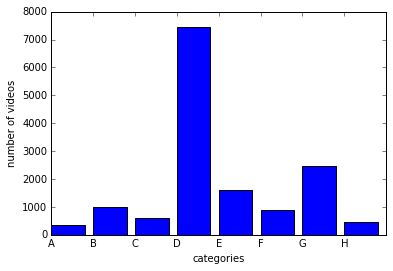

In [16]:
index = np.arange(8)
categories=df1_info.index
plt.bar(index,df1_info.loc[:]['adview']['count'])
plt.xticks(index,categories)
plt.xlabel('categories')
plt.ylabel('number of videos')
plt.show()

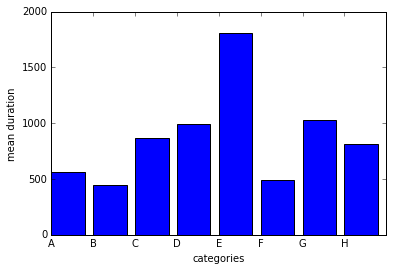

In [17]:
index = np.arange(8)
categories=df1_info.index
plt.bar(index,df1_info.loc[:]['duration_seconds']['mean'])
plt.xticks(index,categories)
plt.xlabel('categories')
plt.ylabel('mean duration')
plt.show()

In [18]:
#Visualizing views vs adviews and views vs likes and views vs dislikes and views vs comments.
category_views=df1_info.loc[:]['views']['mean']
category_likes=df1_info.loc[:]['likes']['mean']
category_dislikes=df1_info.loc[:]['dislikes']['mean']
category_comments=df1_info.loc[:]['comment']['mean']
category_adviews=df1_info.loc[:]['adview']['mean']

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


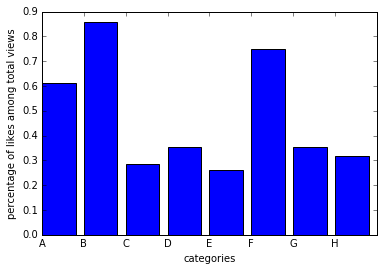

In [19]:
percentage_likes=(category_likes/category_views)*100
percentage_dislikes=(category_dislikes/category_views)*100
percentage_comments=(category_comments/category_views)*100
percentage_adviews=(category_adviews/category_views)*100

plt.bar(index,percentage_likes)
plt.xticks(index,categories)
plt.xlabel('categories')
plt.ylabel('percentage of likes among total views')
plt.show()

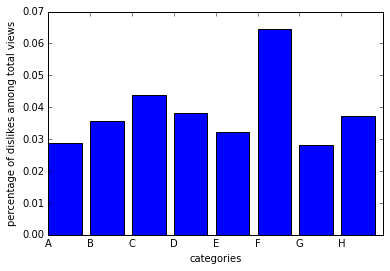

In [20]:
plt.bar(index,percentage_dislikes)
plt.xticks(index,categories)
plt.xlabel('categories')
plt.ylabel('percentage of dislikes among total views')

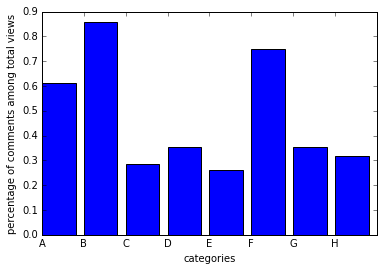

In [21]:
plt.bar(index,percentage_comments)
plt.xticks(index,categories)
plt.xlabel('categories')
plt.ylabel('percentage of comments among total views')

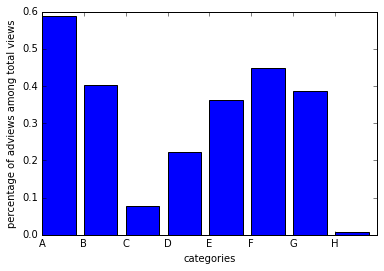

In [22]:
plt.bar(index,percentage_adviews)
plt.xticks(index,categories)
plt.xlabel('categories')
plt.ylabel('percentage of adviews among total views')

# Insights from data and above graphs.
1.What we conclude is C(maybe) and H(definately) category videos are ones with less ads compared to others.<br>
2.Categories with high standard deviation in views contains some of most viewed videos like category G.<br>
3.Category G contains videos with less no of ads as well as high no of ads.<br>
4.Category B and F videos gets more comments and likes compared to others.<br>
5.Catgory G which is most viewd category.<br>
6.Category D videos uploaded more than others.<br>
7.Category F videos most dislikes respective to their number of views.<br>
8.Category F with most number of comments respective to their number of views.<br>
9.Category F videos must be controversial as they are getting high likes,dislikes and also comments so maybe these are political videos.<br>
10.Comparative to total views category A got,most of ads showed in this.<br>
11.Category E contains some long videos compared to others.<br>
And many others possible to observe.<br>

## Feature Engineering,Models and Evaluation

   So now we will be applying models and will be doing feature engineering according to requirment of models.
   As we don't have that many features so don't need to do dimensionality reduction.

In [23]:
#encoding category
df=pd.concat([df,encoding_category(df)],axis=1)
df.drop('category',axis=1,inplace=True)

In [24]:
#converting published to days passed till today
df['days_passed']=published_transformation(df)
df.drop('published',axis=1,inplace=True)

In [25]:
df.drop('duration',axis=1,inplace=True)
df.head(8)

,vidid,adview,views,likes,dislikes,comment,duration_seconds,Category_A,Category_B,Category_C,Category_D,Category_E,Category_F,Category_G,Category_H,days_passed
0,VID_18655,40,1031602,8523,363,8523,457,0,0,0,0,0,1,0,0,821
1,VID_14135,2,1707,56,2,56,570,0,0,0,1,0,0,0,0,1078
2,VID_2187,1,2023,25,0,25,136,0,0,1,0,0,0,0,0,895
3,VID_23096,6,620860,777,161,777,262,0,0,0,0,0,0,0,1,870
4,VID_10175,1,666,1,0,1,31,0,0,0,1,0,0,0,0,898
5,VID_10756,4,78,0,0,0,15,0,0,0,1,0,0,0,0,949
6,VID_9782,40621,43118,15,1,15,200,0,0,0,1,0,0,0,0,1211
7,VID_16452,1,14205,55,16,55,58,0,0,0,0,1,0,0,0,865


In [26]:
df.head(5)

,vidid,adview,views,likes,dislikes,comment,duration_seconds,Category_A,Category_B,Category_C,Category_D,Category_E,Category_F,Category_G,Category_H,days_passed
0,VID_18655,40,1031602,8523,363,8523,457,0,0,0,0,0,1,0,0,821
1,VID_14135,2,1707,56,2,56,570,0,0,0,1,0,0,0,0,1078
2,VID_2187,1,2023,25,0,25,136,0,0,1,0,0,0,0,0,895
3,VID_23096,6,620860,777,161,777,262,0,0,0,0,0,0,0,1,870
4,VID_10175,1,666,1,0,1,31,0,0,0,1,0,0,0,0,898


### 1.Random Forest Regressor

In [27]:
train=df.drop(df[df['adview']>1000].index)
X=train.drop(['vidid','adview'],axis=1)
Y=train['adview']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=42)

In [29]:
X_train.columns

Index([u'views', u'likes', u'dislikes', u'comment', u'duration_seconds',
       u'Category_A', u'Category_B', u'Category_C', u'Category_D',
       u'Category_E', u'Category_F', u'Category_G', u'Category_H',
       u'days_passed'],
      dtype='object')

### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 3)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 350, 500]}


In [31]:
from sklearn.ensemble import RandomForestRegressor
best_random = RandomForestRegressor(bootstrap=True,
 max_depth=40,
 max_features='auto',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 200)

/home/spartan/.local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


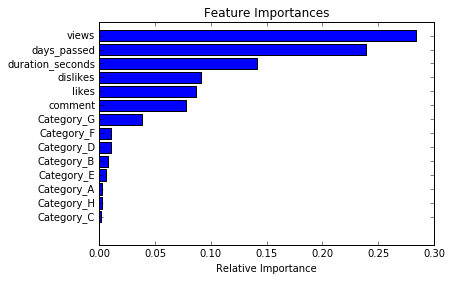

In [32]:
best_random.fit(X_train,y_train)
features=X_train.columns
c=best_random.feature_importances_
indices = np.argsort(c)
plt.title('Feature Importances')
plt.barh(range(len(indices)), c[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 2.XGboost model

In [33]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
predictions1 = xgb.predict(X_test)


In [34]:
#5-fold Cross Validation for counteract overfitting
from sklearn.model_selection import cross_val_score
accuracies1=cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=5)


In [35]:
test=pd.read_csv('/home/spartan/Desktop/hiringtask-master/machine_learning/ad_org/data/mn/ad_org_test.csv')
test=data_transformation(test)
test=pd.concat([test,encoding_category(test)],axis=1)
test.drop('category',axis=1,inplace=True)
test['days_passed']=published_transformation(test)
test.drop('published',axis=1,inplace=True)
test['duration_seconds']=duration_transformtion(test)
test.drop('duration',axis=1,inplace=True)
test.head(8)

,vidid,views,likes,dislikes,comment,Category_A,Category_B,Category_C,Category_D,Category_E,Category_F,Category_G,Category_H,days_passed,duration_seconds
0,VID_1054,440238,6153,218,6153,0,1,0,0,0,0,0,0,664,449
1,VID_18629,1040132,8171,340,8171,0,0,0,0,0,1,0,0,899,389
2,VID_13967,28534,31,11,31,0,0,0,1,0,0,0,0,1740,2274
3,VID_19442,1316715,2284,250,2284,0,0,0,0,0,0,1,0,3114,595
4,VID_770,1893173,2519,225,2519,0,1,0,0,0,0,0,0,832,188
5,VID_10315,145820,215,29,215,0,0,0,1,0,0,0,0,1786,2358
6,VID_7417,12921,169,3,169,0,0,0,1,0,0,0,0,1688,604
7,VID_17788,4502,65,2,65,0,0,0,0,0,1,0,0,884,155


In [36]:
result=pd.DataFrame()
result['Vid_id']=test['vidid']
result['adview']=pd.Series(best_random.predict(test.drop('vidid',axis=1)))
result.to_csv('result_random_forest.csv',index=False)

In [37]:
test_data=data=pd.DataFrame()
test_data['views']=test['views']
test_data['likes']=test['likes']
test_data['dislikes']=test['dislikes']
test_data['comment']=test['comment']
test_data['duration_seconds']=test['duration_seconds']
test_data['Category_A']=test['Category_A']
test_data['Category_B']=test['Category_B']
test_data['Category_C']=test['Category_C']
test_data['Category_D']=test['Category_D']
test_data['Category_E']=test['Category_E']
test_data['Category_F']=test['Category_F']
test_data['Category_G']=test['Category_G']
test_data['Category_H']=test['Category_H']
test_data['days_passed']=test['days_passed']


In [38]:
result=pd.DataFrame()
result['Vid_id']=test['vidid']
result['adview']=pd.Series(xgb.predict(test_data))
result.to_csv('result_xgb.csv',index=False)